In [12]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
austin_weather_data = pd.read_csv("data/austin_weather.csv")
austin_weather_data.head()

Date  TempHighF  TempAvgF  TempLowF DewPointHighF DewPointAvgF  \
0  2013-12-21         74        60        45            67           49   
1  2013-12-22         56        48        39            43           36   
2  2013-12-23         58        45        32            31           27   
3  2013-12-24         61        46        31            36           28   
4  2013-12-25         58        50        41            44           40   

  DewPointLowF HumidityHighPercent HumidityAvgPercent HumidityLowPercent  ...  \
0           43                  93                 75                 57  ...   
1           28                  93                 68                 43  ...   
2           23                  76                 52                 27  ...   
3           21                  89                 56                 22  ...   
4           36                  86                 71                 56  ...   

  SeaLevelPressureAvgInches SeaLevelPressureLowInches VisibilityHighMiles  \
0                     29.68                     29.59                  10   
1                     30.13                     29.87                  10   
2                     30.49                     30.41                  10   
3                     30.45                      30.3                  10   
4                     30.33                     30.27                  10   

  VisibilityAvgMiles VisibilityLowMiles WindHighMPH WindAvgMPH WindGustMPH  \
0                  7                  2          20          4          31   
1                 10                  5          16          6          25   
2                 10                 10           8          3          12   
3                 10                  7          12          4          20   
4                 10                  7          10          2          16   

  PrecipitationSumInches               Events  
0                   0.46  Rain , Thunderstorm  
1                      0                       
2                      0                       
3                      0                       
4                      T                       

[5 rows x 21 columns]

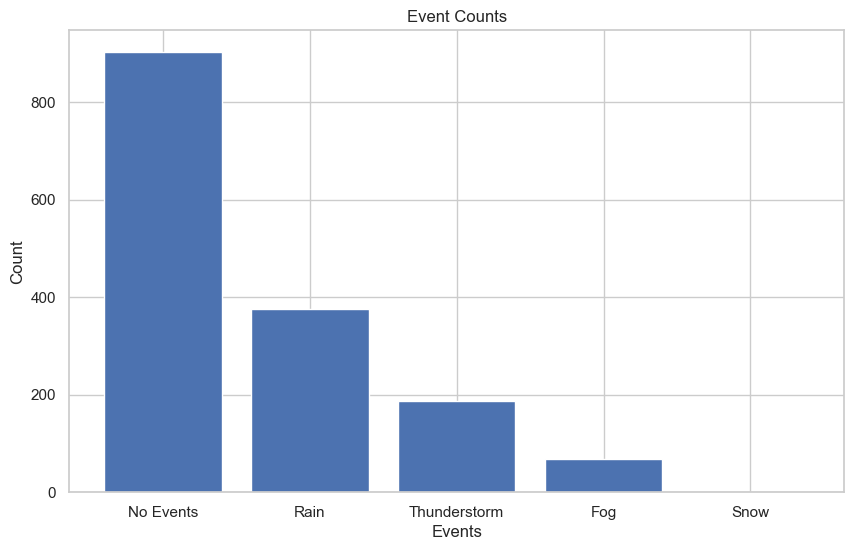

In [122]:
df = austin_weather_data['Events']
df = df.replace(np.nan,'No Events')
df_split = df.str.split(',', expand=True).stack().str.strip()
df_split = df_split.reset_index(level=1, drop=True).rename('Events')
event_counts = df_split.value_counts(dropna = False).reset_index()
event_counts.columns = ['Events', 'Count']

plt.figure(figsize=(10, 6))
plt.bar(event_counts['Events'], event_counts['Count'])
plt.xlabel('Events')
plt.ylabel('Count')
plt.title('Event Counts')
plt.show()